# <span style="color:#FFD700">DIPESH SINGH<br> KCE080BCT008</span>

### About Dataset
Used Car Price Prediction Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, https://www.cars.com. This dataset comprises 4,009 data points, each representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

#### Features

* Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
* Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
* Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
* Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
* Engine Type: Understand the engine specifications, shedding light on performance and efficiency.
* Transmission: Determine the transmission type, whether automatic, manual, or another variant.
* Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
* Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
* Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
* Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.<br>
<p>This dataset is a valuable resource for automotive enthusiasts, buyers, and researchers interested in analyzing trends, making informed purchasing decisions or conducting studies related to the automotive industry and consumer preferences. Whether you are a data analyst, car buyer, or researcher, this dataset offers a wealth of information to explore and analyze.</P>

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('used_cars.csv')


In [72]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


#### <span style="color:#1B98E0">Data Cleaning</span>

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [75]:
#filling null in accident column with 'None reported'
df['accident'].fillna('None reported',inplace=True)
#filling clean_title with 
df['clean_title'].fillna('No',inplace=True)
#removing rows with empty fuel  type
df.dropna(subset=['fuel_type'],inplace=True)



In [76]:
df.shape

(3839, 12)

In [77]:
df['brand'].unique()


array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar', 'Mercedes-Benz',
       'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia', 'Jeep',
       'Bentley', 'Honda', 'MINI', 'Porsche', 'Hummer', 'Chrysler',
       'Volvo', 'Cadillac', 'Lamborghini', 'Maserati', 'Volkswagen',
       'Subaru', 'GMC', 'RAM', 'Alfa', 'Ferrari', 'Scion', 'Mitsubishi',
       'Mazda', 'Saturn', 'Bugatti', 'Rolls-Royce', 'McLaren', 'Buick',
       'Lotus', 'Pontiac', 'FIAT', 'Saab', 'Mercury', 'Plymouth', 'smart',
       'Maybach', 'Suzuki'], dtype=object)

In [78]:
df["milage"]=df["milage"].str.replace(r'[^0-9]','',regex=True)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"


In [79]:
df['fuel_type'].unique()
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [80]:
#filtering fuel type by not including inputs with ('-' & 'not supported')
df=df[~df["fuel_type"].isin(["-", "not supported"])]


In [81]:
plug_in_hybrid_data = df[df['fuel_type'] == 'Plug-In Hybrid']
plug_in_hybrid_data.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
60,Volvo,XC90 Hybrid T8 R-Design,2018,40000,Plug-In Hybrid,400.0HP 2.0L 4 Cylinder Engine Plug-In Electri...,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$42,000"
103,BMW,i8 Base,2019,41500,Plug-In Hybrid,369.0HP 1.5L 3 Cylinder Engine Plug-In Electri...,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,"$86,000"
124,Porsche,Cayenne E-Hybrid S,2016,96000,Plug-In Hybrid,416.0HP 3.0L V6 Cylinder Engine Plug-In Electr...,Transmission w/Dual Shift Mode,White,Red,At least 1 accident or damage reported,Yes,"$23,000"
239,Lincoln,Corsair Grand Touring,2021,1850,Plug-In Hybrid,266.0HP 2.5L 4 Cylinder Engine Plug-In Electri...,CVT Transmission,Silver,Beige,None reported,Yes,"$49,000"
293,BMW,i8 Base,2015,846,Plug-In Hybrid,357.0HP 1.5L 3 Cylinder Engine Plug-In Electri...,A/T,White,White,None reported,Yes,"$86,999"


In [82]:
df['engine'].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
                                                         ..
148.0HP 3.0L V6 Cylinder Engine Gasoline Fuel             1
134.0HP 1.8L 4 Cylinder Engine Plug-In Electric/Gas       1
362.0HP 5.4L 8 Cylinder Engine Gasoline Fuel              1
281.0HP 2.5L 4 Cylinder Engine Gasoline Fuel              1
139.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid        1
Name: count, Length: 1096, dtype: int64

In [83]:
#extracting necessary features from engine

In [84]:
df["horsepower"] = df["engine"].str.extract(r"(\d+\.?\d*)HP")
df["size"] = df["engine"].str.extract(r"(\d+\.?\d*)L")
df["cylinders"] = df["engine"].str.extract(r"(\d+)\sCylinder")

In [85]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,size,cylinders
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",300.0,3.7,6
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005",NaN,3.8,NaN
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598",NaN,NaN,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",354.0,3.5,6
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999",NaN,2.0,NaN


In [86]:
df['brand'].value_counts()

brand
Ford             374
BMW              370
Mercedes-Benz    312
Chevrolet        287
Toyota           196
Audi             194
Porsche          192
Lexus            163
Jeep             143
Land             130
Nissan           111
Cadillac         106
RAM               91
GMC               90
Dodge             90
Kia               72
Hyundai           69
Acura             64
Mazda             64
Subaru            64
Honda             63
INFINITI          59
Volkswagen        56
Lincoln           52
Jaguar            47
Volvo             37
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
Scion              6
McLaren            6
Saturn             5
Lotus              4
FIAT               4
Mercury            3
Saab               2
Bugatti

In [87]:
df.dropna(subset=['horsepower','size','cylinders'],inplace=True)
df.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,size,cylinders
4002,Mercedes-Benz,AMG GLS 63 4MATIC,2023,2000,Hybrid,603.0HP 4.0L 8 Cylinder Engine Gasoline/Mild E...,9-Speed A/T,Gray,Beige,None reported,Yes,"$175,000",603.0,4.0,8
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,"$25,900",241.0,2.0,4
4005,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900",349.0,3.0,6
4007,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999",450.0,3.5,6
4008,BMW,X3 xDrive30i,2020,43000,Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000",248.0,2.0,4


In [88]:
#since we have extracted all the necessary feature from the column 'engine' so we can now drop the engine column
df.drop(columns='engine',inplace=True)
df.head(3) 

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,size,cylinders
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",300.0,3.7,6
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",354.0,3.5,6
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000",292.0,2.0,4


In [89]:
df['transmission'].value_counts()

transmission
A/T                               931
8-Speed A/T                       405
Transmission w/Dual Shift Mode    396
6-Speed A/T                       360
6-Speed M/T                       241
7-Speed A/T                       209
10-Speed A/T                      119
5-Speed A/T                        84
9-Speed A/T                        72
4-Speed A/T                        68
CVT Transmission                   62
5-Speed M/T                        53
M/T                                40
7-Speed M/T                        10
Transmission Overdrive Switch       7
Name: count, dtype: int64

In [90]:
df.shape

(3057, 14)

In [91]:
def group_transmission_type(trans):
    if 'A/T' in trans:
        return 'Automatic'
    elif 'M/T' in trans:
        return 'Manual'
    elif 'CVT' in trans:
        return 'CVT'
    elif 'w/Dual' in trans:
        return 'Dual'
    else:
        return 'Other'

# Apply the grouping function
df['transmission'] = df['transmission'].apply(group_transmission_type)
#transmission feature will only conatain (automatic,manual CVT and Dual)
df = df[~df['transmission'].isin(['Other'])]


In [92]:
df['transmission'].value_counts()

transmission
Automatic    2248
Dual          396
Manual        344
CVT            62
Name: count, dtype: int64

In [93]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,size,cylinders
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",300.0,3.7,6
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,"$15,500",354.0,3.5,6
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,Automatic,Blue,Black,None reported,Yes,"$31,000",292.0,2.0,4
7,BMW,740 iL,2001,242000,Gasoline,Automatic,Green,Green,None reported,Yes,"$7,300",282.0,4.4,8
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,Automatic,Black,Black,None reported,Yes,"$41,927",311.0,3.5,6


In [94]:
df['accident'].value_counts()

accident
None reported                             2178
At least 1 accident or damage reported     872
Name: count, dtype: int64

In [95]:
df["price"]=df["price"].str.replace(r'[^0-9]','',regex=True)


In [96]:
df['clean_title'].value_counts()

clean_title
Yes    2970
No       80
Name: count, dtype: int64

In [97]:
df['ext_col'].value_counts()

ext_col
Black     787
White     713
Gray      434
Silver    335
Blue      307
Red       217
Green      61
Brown      43
Gold       41
Beige      37
Orange     35
Yellow     28
Purple     11
Pink        1
Name: count, dtype: int64

In [121]:
df['int_col'].value_counts()

int_col
Black     1611
Beige      506
Gray       417
Brown      155
Red        113
–           88
White       86
Blue        24
Orange      19
Silver      14
Gold         9
Green        6
Yellow       2
Name: count, dtype: int64

In [124]:
df['int_col'] = df['int_col'].replace('–', 'Black')


In [125]:
df['int_col'].value_counts()

int_col
Black     1699
Beige      506
Gray       417
Brown      155
Red        113
White       86
Blue        24
Orange      19
Silver      14
Gold         9
Green        6
Yellow       2
Name: count, dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3050 entries, 0 to 4008
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   brand         3050 non-null   object  
 1   model         3050 non-null   object  
 2   model_year    3050 non-null   int64   
 3   milage        3050 non-null   int64   
 4   fuel_type     3050 non-null   category
 5   transmission  3050 non-null   category
 6   ext_col       3050 non-null   category
 7   int_col       3050 non-null   category
 8   accident      3050 non-null   int64   
 9   clean_title   3050 non-null   int64   
 10  price         3050 non-null   int64   
 11  horsepower    3050 non-null   float64 
 12  size          3050 non-null   float64 
 13  cylinders     3050 non-null   int64   
dtypes: category(4), float64(2), int64(6), object(2)
memory usage: 275.5+ KB


In [100]:
dulicated_data = df.duplicated()
print(dulicated_data.sum())

0


In [101]:
df['accident'] = df['accident'].apply(lambda x: 1 if x != 'None reported' else 0)

# Convert 'clean_title' to binary, treating missing values as 0
df['clean_title'] = df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

In [102]:
df['milage'] = pd.to_numeric(df['milage'], errors='coerce')
df['model'] = df['model'].astype(str)
df['fuel_type'] = df['fuel_type'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['ext_col'] = df['ext_col'].astype('category')
df['int_col'] = df['int_col'].astype('category')
df['accident'] = pd.to_numeric(df['accident'], errors='coerce')
df['clean_title'] = pd.to_numeric(df['clean_title'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')


EDA

In [103]:
df.describe()

,model_year,milage,accident,clean_title,price,horsepower,size,cylinders
count,3050.000000,3050.000000,3050.000000,3050.000000,3.050000e+03,3050.000000,3050.000000,3050.000000
mean,2014.385574,73293.679016,0.285902,0.973770,3.828222e+04,326.529180,3.734033,6.250820
std,5.879086,53441.932146,0.451917,0.159843,7.104403e+04,113.528598,1.412271,1.674096
min,1996.000000,100.000000,0.000000,0.000000,2.000000e+03,70.000000,1.000000,3.000000
25%,2011.000000,31685.750000,0.000000,1.000000,1.500000e+04,247.000000,2.500000,5.000000
50%,2016.000000,64500.000000,0.000000,1.000000,2.727500e+04,310.000000,3.500000,6.000000
75%,2019.000000,103797.500000,1.000000,1.000000,4.600000e+04,400.000000,4.700000,8.000000
max,2024.000000,405000.000000,1.000000,1.000000,2.954083e+06,808.000000,8.400000,12.000000


Univeriate analysis:
Analyzing the distibution of numerical features


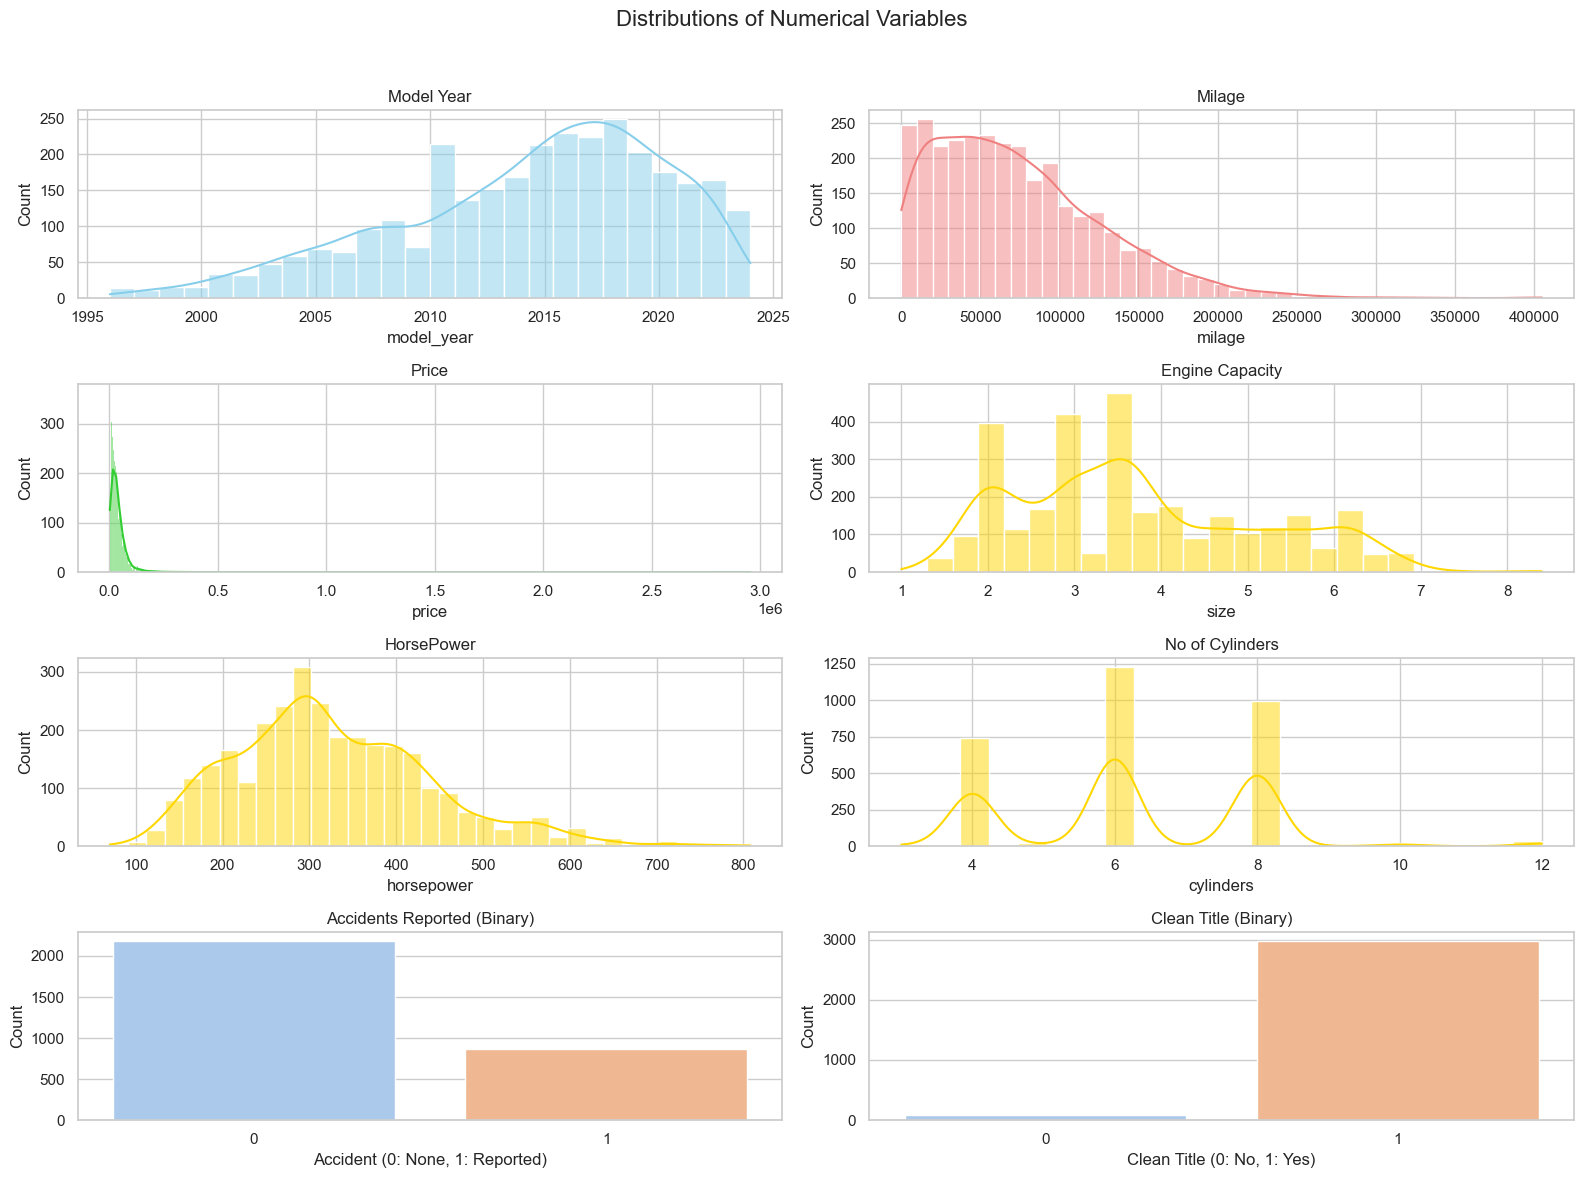

In [133]:
# Set up the plotting style
sns.set(style="whitegrid", palette="muted")

# 1. Visualize distributions for numerical variables
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.suptitle('Distributions of Numerical Variables', fontsize=16)

# Model Year
sns.histplot(df['model_year'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Model Year')

# Milage
sns.histplot(df['milage'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Milage')

# Price
sns.histplot(df['price'], kde=True, ax=axes[1, 0], color='limegreen')
axes[1, 0].set_title('Price')

# Engine Capacity
sns.histplot(df['size'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Engine Capacity')

# Horse Power
sns.histplot(df['horsepower'], kde=True, ax=axes[2, 0], color='gold')
axes[2, 0].set_title('HorsePower')

# Cylinders
sns.histplot(df['cylinders'], kde=True, ax=axes[2, 1], color='gold')
axes[2, 1].set_title('No of Cylinders')

# Accident 
sns.countplot(x=df['accident'], ax=axes[3, 0], palette="pastel")
axes[3, 0].set_title('Accidents Reported (Binary)')
axes[3, 0].set_xlabel('Accident (0: None, 1: Reported)')
axes[3, 0].set_ylabel('Count')


# Clean Title B
sns.countplot(x=df['clean_title'], ax=axes[3, 1], palette="pastel")
axes[3, 1].set_title('Clean Title (Binary)')
axes[3, 1].set_xlabel('Clean Title (0: No, 1: Yes)')
axes[3, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Model Year:

* The majority of cars in the dataset are recent models, with a peak around 2015–2020.
* Older model years are relatively rare, especially before 2000.
* The distribution is skewed toward newer vehicles, reflecting a focus on more recent cars.

Mileage:

* Mileage distribution is right-skewed, with most vehicles having lower mileage (under 100,000).
* A small number of vehicles have very high mileage, up to 400,000.
* This indicates that the dataset contains a mix of lightly and heavily used vehicles, though newer models dominate.

Price:

* Price distribution is highly right-skewed, with most vehicles priced in the lower range.
* There are a few very high-priced vehicles, indicating the presence of luxury or high-end cars.
* The majority of prices fall under $1 million, with only a few outliers in the range above.

Engine Capacity (Size):

* The engine capacity distribution shows multiple peaks, with many vehicles having engines around 2.0, 3.0, and 4.0 liters.
* Larger engine sizes (above 6 liters) are less common, indicating fewer high-performance or specialty vehicles.
* This suggests a variety of vehicle types, from economy to performance-oriented cars.

Horsepower:

* Horsepower distribution is slightly right-skewed, with a peak around 200–300 horsepower.
* Vehicles with very high horsepower (above 500) are rare, suggesting fewer sports or luxury cars.
* The data suggests that most vehicles have moderate power suitable for everyday use.

Number of Cylinders:

* The distribution shows distinct peaks, corresponding to vehicles with 4, 6, and 8 cylinders.
* 4-cylinder engines are the most common, followed by 6-cylinder and 8-cylinder engines.
* This reflects the popularity of compact, mid-size, and performance vehicles in the dataset.

Accidents Reported (Binary):

* Most vehicles in the dataset have no reported accidents (category 0).
* A smaller portion of vehicles have reported accidents (category 1), indicating that the dataset is predominantly composed of accident-free cars.

Clean Title (Binary):

* A vast majority of vehicles have a clean title (category 1), signifying no major issues like salvage or rebuilt status.
Only a very small number of vehicles have non-clean titles (category 0), suggesting they are exceptions in this dataset.

Univeriate analysis:
Analyzing the distibution of categorical features


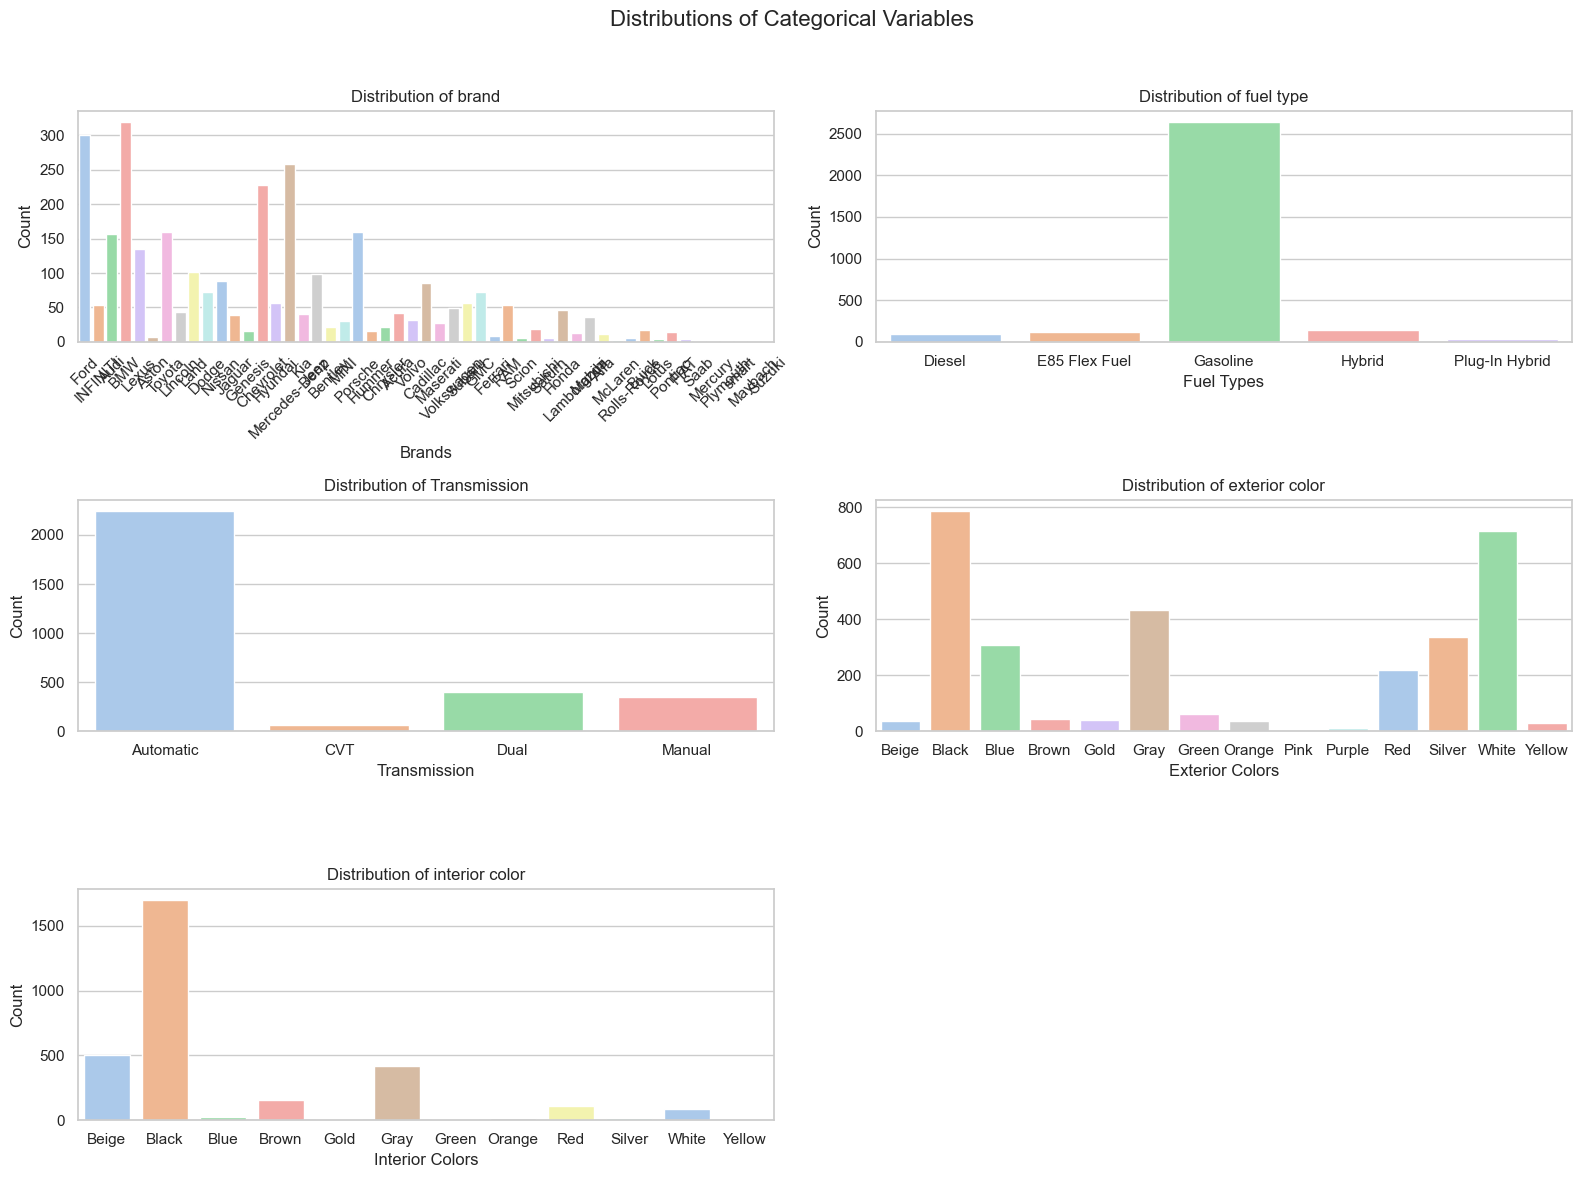

In [130]:
# Visualize distributions for categorical variables
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Distributions of Categorical Variables', fontsize=16)

# Distribution of brand
sns.countplot(x=df['brand'], ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title('Distribution of brand')
axes[0, 0].set_xlabel('Brands')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Distribution of fuel type
sns.countplot(x=df['fuel_type'], ax=axes[0, 1], palette="pastel")
axes[0, 1].set_title('Distribution of fuel type')
axes[0, 1].set_xlabel('Fuel Types')
axes[0, 1].set_ylabel('Count')

# Distribution of transmission
sns.countplot(x=df['transmission'], ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title('Distribution of Transmission')
axes[1, 0].set_xlabel('Transmission')
axes[1, 0].set_ylabel('Count')

# Distribution of exterior color
sns.countplot(x=df['ext_col'], ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title('Distribution of exterior color')
axes[1, 1].set_xlabel('Exterior Colors')
axes[1, 1].set_ylabel('Count')

# Distribution of interior color
sns.countplot(x=df['int_col'], ax=axes[2, 0], palette="pastel")
axes[2, 0].set_title('Distribution of interior color')
axes[2, 0].set_xlabel('Interior Colors')
axes[2, 0].set_ylabel('Count')

# Turn off the last unused subplot (axes[2, 1])
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Distribution of Brand:

* The dataset includes a variety of car brands.
* Some brands, such as Ford, BMW, and Toyota, have significantly higher counts compared to others like Rolls-Royce and Maybach.
* The distribution is heavily skewed toward a few popular brands, indicating their dominance in the dataset.

Distribution of Fuel Type:

* Gasoline is the most common fuel type, dominating the dataset by a large margin.
* Other fuel types like Diesel, Hybrid, and E85 Flex Fuel have relatively fewer counts.
* Plug-In Hybrid appears to be the least frequent category.

Distribution of Transmission:

* The majority of cars have Automatic transmissions, indicating its popularity or prevalence.
* Other types of transmissions, like Dual and Manual, have similar but much lower counts compared to automatic.
* CVT transmission is the least frequent in the dataset.

Distribution of Exterior Color:

* The most common exterior colors are White, Black, and Silver, reflecting their popularity in the market.
* Less common colors include Orange, Purple, and Pink.
* There is a noticeable drop-off in frequency for non-neutral colors, indicating buyer preference for neutral shades.

Distribution of Interior Color:

* Black interiors dominate the dataset, far outnumbering other colors.
* Gray is the second most common interior color.
* Bright or uncommon colors like Yellow, Orange, and Red are rare for interiors, reflecting a tendency toward more subdued interior color choices.

Bivariate analysis

1.Numerical vs Numerical:
Computing correlation coefficients.

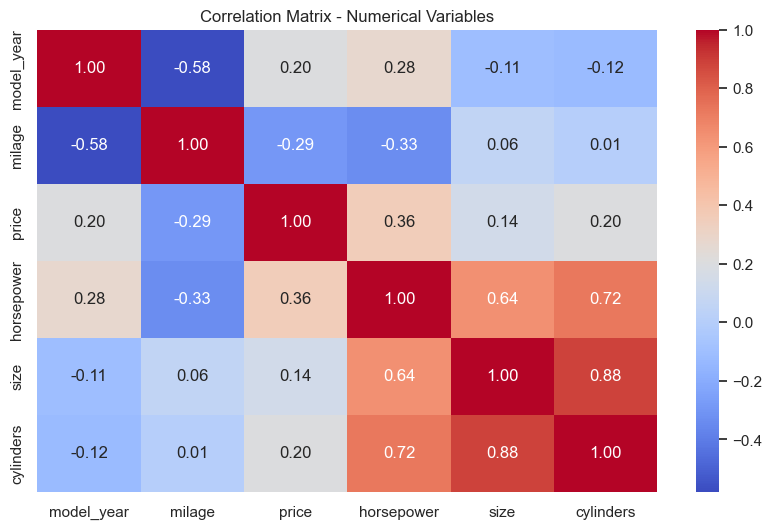

In [134]:
# 1. Numerical vs Numerical Analysis - Correlation Matrix
correlation_matrix = df[['model_year', 'milage', 'price', 'horsepower', 'size', 'cylinders']].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix - Numerical Variables')
plt.show()

Observations from Correlation Matrix:

Strong Positive Correlations:

* size and cylinders (𝑟=0.88).
* horsepower and cylinders (𝑟=0.72).
* horsepower and size (𝑟=0.64).

Negative Correlations:

* milage and model_year (𝑟=−0.58), indicating newer models tend to have lower mileage.

Moderate Positive Correlations:

* price and horsepower (𝑟=0.36).
* price and cylinders (𝑟=0.20).

Scatter plots for numerical variables.

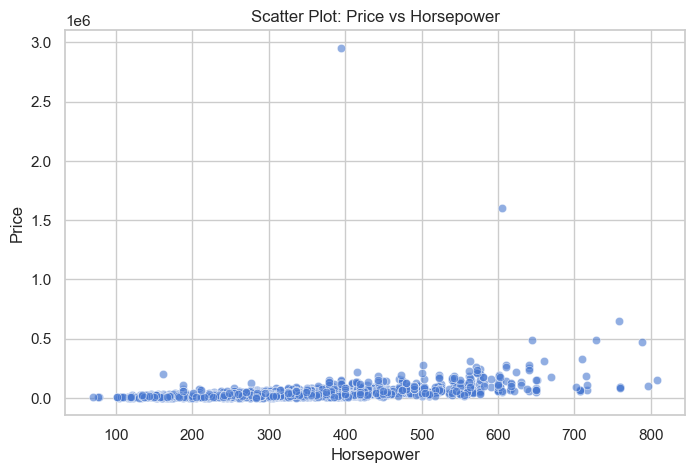

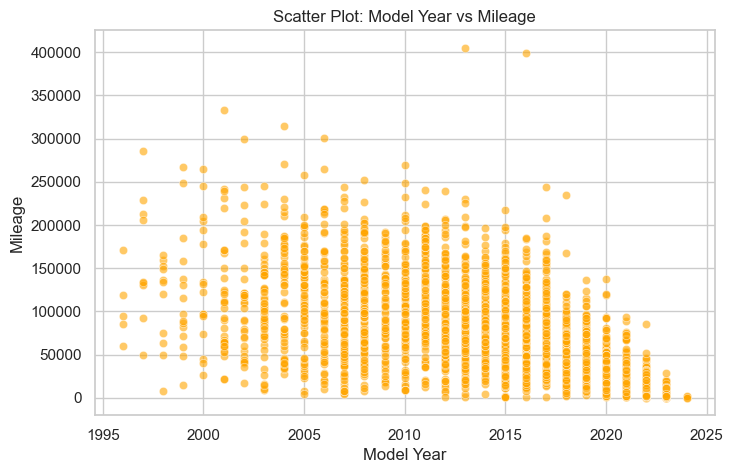

In [135]:
# 2. Scatter Plots for Numerical vs Numerical Relationships

# Scatter plot: Price vs Horsepower
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='horsepower', y='price', alpha=0.6)
plt.title('Scatter Plot: Price vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

# Scatter plot: Model Year vs Mileage
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='model_year', y='milage', alpha=0.6, color='orange')
plt.title('Scatter Plot: Model Year vs Mileage')
plt.xlabel('Model Year')
plt.ylabel('Mileage')
plt.show()

Observations from Scatter Plots:
Price vs. Horsepower:

There is a general trend of increasing price with horsepower, but the relationship is not very strong due to outliers and a spread of prices for similar horsepower levels.
High-end cars with higher horsepower are priced significantly higher.
Model Year vs. Mileage:

A clear negative relationship is observed: newer models tend to have lower mileage.
Older models (before 2010) show a wide range of mileage, while newer models are concentrated at lower mileage values.

2. Categorical vs Numerical Analysis


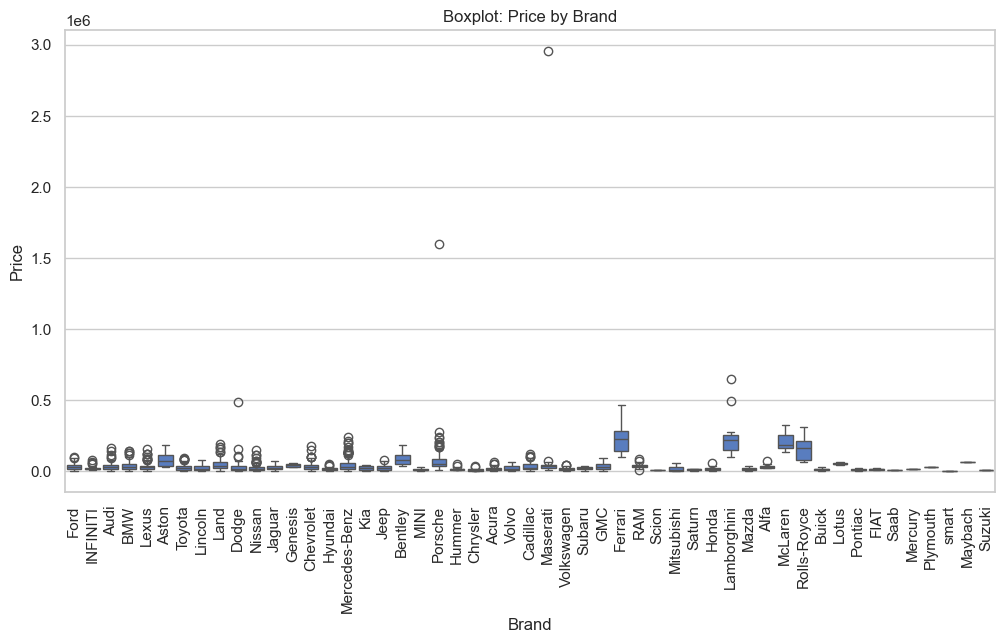

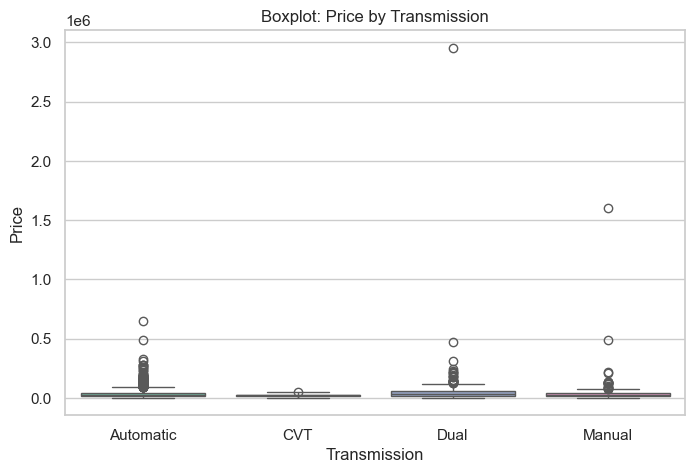

In [136]:
# 3. Boxplots for Categorical vs Numerical Analysis

# Boxplot: Price by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='brand', y='price')
plt.xticks(rotation=90)
plt.title('Boxplot: Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

# Boxplot: Price by Transmission
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='transmission', y='price', palette="Set2")
plt.title('Boxplot: Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

Observations from Boxplots:
Price by Brand:

Brands like Rolls-Royce, McLaren, Lamborghini, and Bentley have the highest price ranges, indicating luxury vehicles.
Popular brands like Toyota, Honda, and Ford exhibit relatively lower and more consistent price ranges.
Price by Transmission:

Cars with Dual (dual-clutch transmission) tend to have higher price ranges, likely due to their advanced technology and association with performance vehicles.
Manual and CVT (Continuously Variable Transmission) show lower price ranges on average.

3. Categorical vs Categorical Relationships

In [ ]:
# 4. Categorical vs Categorical Analysis - Contingency Table and Visualization

# Contingency Table: Brand vs Fuel Type
contingency_table = pd.crosstab(df['brand'], df['fuel_type'])

# Visualize as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Heatmap: Brand vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Brand')
plt.show()

Observations from Brand vs Fuel Type Heatmap:
Gasoline Dominance:

Most brands primarily use Gasoline as the fuel type. Brands like BMW, Mercedes-Benz, and Audi have the highest counts of gasoline-fueled cars.
Diesel and Flex-Fuel Usage:

Brands such as Ford, RAM, and Chevrolet have a notable presence of Diesel and E85 Flex Fuel vehicles.
Mercedes-Benz and Audi also have some Diesel models.
Hybrid and Plug-In Hybrid:

Toyota has the highest number of Hybrid models, followed by Lexus.
Plug-in hybrids are relatively rare, seen mainly in BMW, Toyota, and Volvo.